In [1]:
# Comparing OSPEX fits to the RHESSI microflares using different versions
# of the OSPEX CHIANTI dbase files - focusing on the T,EM values out
# Fit was done using f_vth + bpow in OSPEX
# 
# Using 
# v5.2: 
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_1_250_v52.sav
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_1_10_v52.sav
# v7.1 (sunkit-spex default)
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_1_250_v71.sav
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_1_10_v71.sav
# v9.0.1 (ospex default)
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_01_250_unity_v901.geny
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_07_12_unity_v901_t41.geny
# v10.1 (newly generated by me using approx v9 setup for T and \lambda)
#   https://github.com/ianan/fvth_stuff/blob/main/idl/chianti_cont_1_250_unity_v101_t41.geny
#   https://github.com/ianan/fvth_stuff/blob/main/idl/chianti_lines_1_12_unity_v101_t41.geny
# v10.1 (newly generated by me but using 100 temperature bins, instead of 41 used in v9
#  
# 6-Feb-2024    IGH

### Differences in the CHIANTI database files

Comparing the different CHIANTI files usedfor the thermal model

| File | CHIANTI v | Filesize [MB] | Eng [keV] | logT (N_T)| Date (Note) |
| --- | ---| --- | --- | --- |--- |
| chianti_cont_1_250_v52.sav | 5.2| 6.2 | 200-1 | 6-8 (200) | 2006-03|
| chianti_lines_1_10_v52.sav | 5.2 |1.4 | 10-1| 6-8 (500) | |
| chianti_cont_1_250_v71.sav | 7.1| 9.3 | 200-1 | 6-9 (300) | 2015-04 (sunkit-spex default)|
| chianti_lines_1_10_v71.sav| 7.1| 22.4 | 10-1| 6-9 (750) | 2015-04 (sunkit-spex default)|
| chianti_cont_01_250_unity_v901.geny | 9.0.1| 4.7 | 111-0.1 | 6-9 (41) | 2020-08 (ospex default)|
| chianti_lines_07_12_unity_v901_t41.geny| 9.0.1| 23.6 | 12-0.7| 6-9 (41) | 2020-08 (ospex default)|
| chianti_cont_1_250_unity_v101_t41.geny | 10.1| 5.1 | 222-1 | 6-8 (41) | 2023-07 (igh made)|
| chianti_lines_1_12_unity_v101_t41.geny| 10.1| 61.7 | 12-1| 6-8 (41) | 2023-07 (igh made)|

Note that the .geny files are slightly bigger than .sav versions, v10.1 line sav is 70% size of geny, cont save 90% of geny.

Most are in `concat_dir(getenv('SSWDB_XRAY'),'chianti/')`, i.e. **/ssw/packages/xray/dbase/chianti/** with
- `getenv('CHIANTI_CONT_FILE')` giving **chianti_cont_01_250_unity_v901.geny** 
- `getenv('CHIANTI_LINES_FILE')` giving **chianti_lines_07_12_unity_v901_t41.geny**

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sunpy.io.special import read_genx
from astropy.time import Time

import warnings
warnings.simplefilter('ignore')

matplotlib.rcParams['font.size']=14

In [3]:
# Load in the results files
r05=read_genx('wee_2024_vth52_bpow.genx')
r07=read_genx('wee_2024_vth71_bpow.genx')
r09=read_genx('wee_2024_vth90_bpow.genx')
r10=read_genx('wee_2024_vth101_bpow.genx')
r10t=read_genx('wee_2024_vth101_t100_bpow.genx')

In [4]:
# Restructure things to make it easier to work with
tmk05=[r["OSX_P"][1] for r in r05["SAVEGEN0"]]
em05=[r["OSX_P"][0]*1e49 for r in r05["SAVEGEN0"]]

tmk07=[r["OSX_P"][1] for r in r07["SAVEGEN0"]]
em07=[r["OSX_P"][0]*1e49 for r in r07["SAVEGEN0"]]

tmk09=[r["OSX_P"][1] for r in r09["SAVEGEN0"]]
em09=[r["OSX_P"][0]*1e49 for r in r09["SAVEGEN0"]]

tmk10=[r["OSX_P"][1] for r in r10["SAVEGEN0"]]
em10=[r["OSX_P"][0]*1e49 for r in r10["SAVEGEN0"]]

tmk10t=[r["OSX_P"][1] for r in r10t["SAVEGEN0"]]
em10t=[r["OSX_P"][0]*1e49 for r in r10t["SAVEGEN0"]]

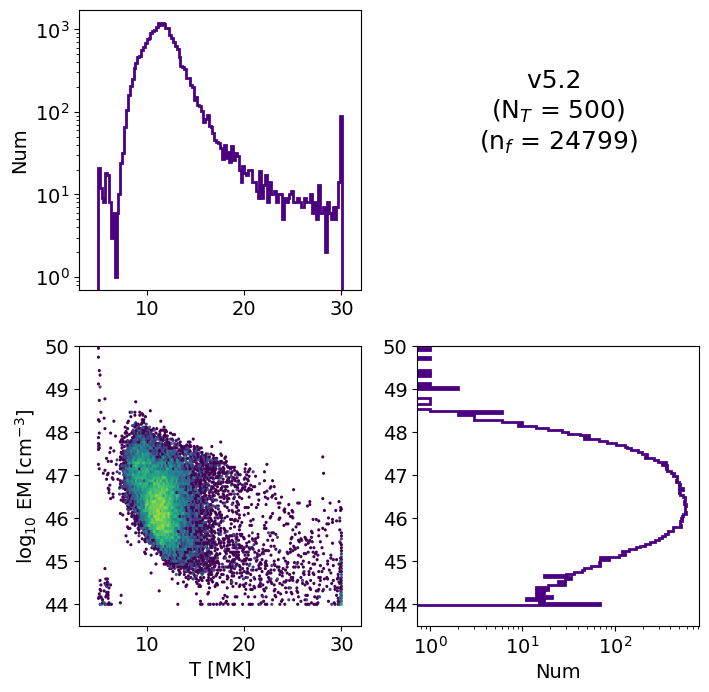

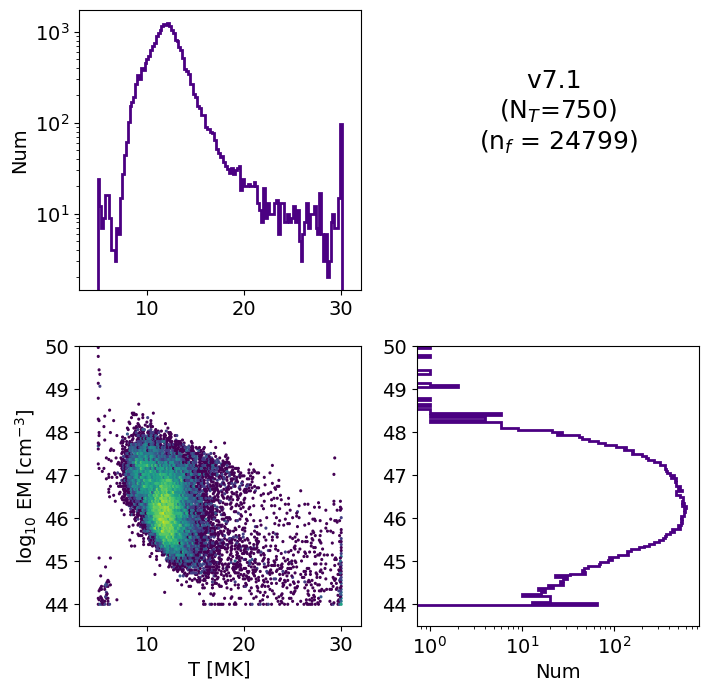

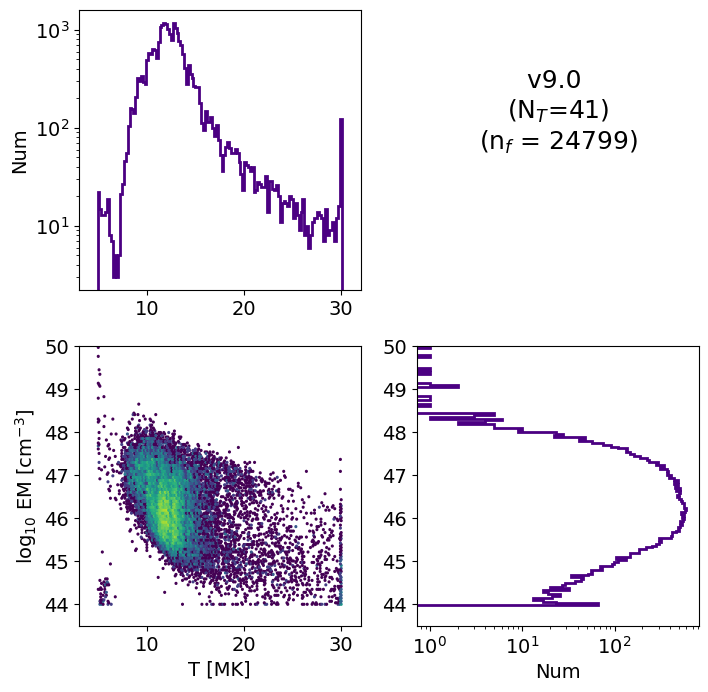

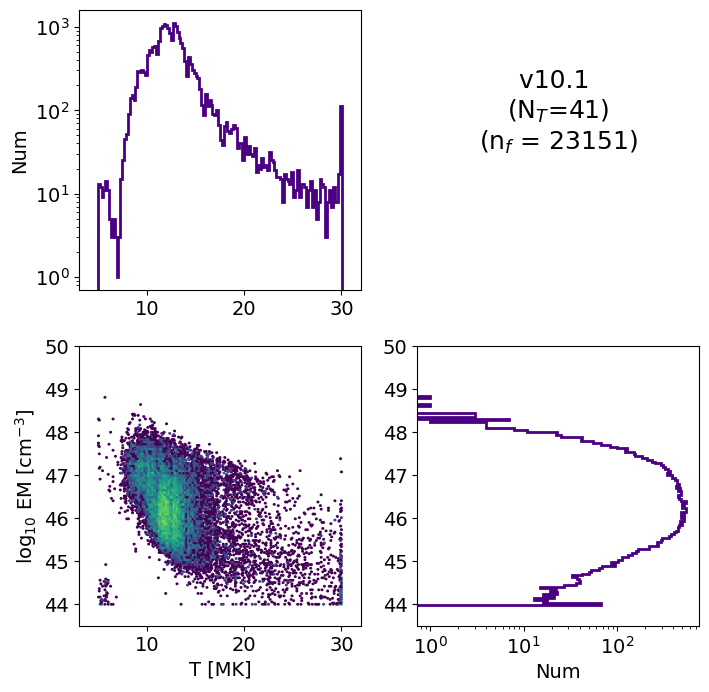

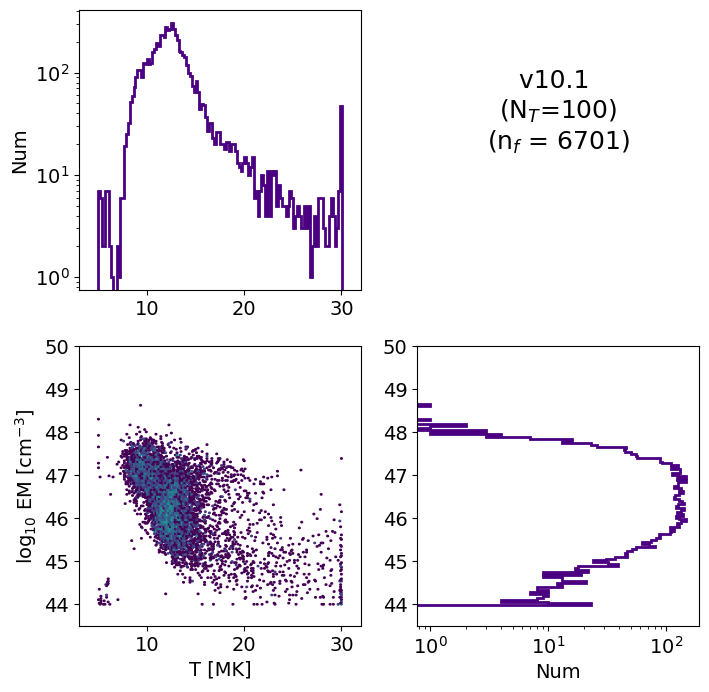

In [5]:
def corner_tem(tmk,em,title):
    gs=150
    vmax=50
    tmkr=[3,32]
    emr=[43.5,50]
    fig,axs=plt.subplots(2,2,figsize=(8,8))
    hex=axs[1,0].hexbin(tmk,np.log10(em),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
    axs[1,0].set_xlim(tmkr)
    axs[1,0].set_ylim(emr)
    axs[1,0].set_ylabel('log$_{10}$ EM [cm$^{-3}$]')
    axs[1,0].set_xlabel('T [MK]')
    # axs[1,0].set_title(title)
    # fig.colorbar(hex,ax=axs[1,0])

    axs[0,1].text(0.5,0.5,title,ha='center',fontsize=18)

    axs[0,0].hist(tmk,bins=gs,range=tmkr,\
                  histtype='step',lw=2,color='indigo')
    axs[0,0].set_xlim(tmkr)
    axs[0,0].set_ylabel('Num')
    axs[0,0].set_yscale('log')

    axs[1,1].hist(np.log10(em),bins=gs,range=emr,\
                  histtype='step', orientation="horizontal",lw=2,color='indigo')
    axs[1,1].set_xlabel('Num')
    axs[1,1].set_ylim(emr)
    axs[1,1].set_xscale('log')

    axs[0,1].axis('off')

    plt.show()
    
    return


corner_tem(tmk05,em05,f'v5.2 \n(N$_T$ = 500)\n(n$_f$ = {np.count_nonzero(tmk05):.0f})')
corner_tem(tmk07,em07,f'v7.1 \n(N$_T$=750)\n(n$_f$ = {np.count_nonzero(tmk07):.0f})')
corner_tem(tmk09,em09,f'v9.0 \n(N$_T$=41)\n(n$_f$ = {np.count_nonzero(tmk09):.0f})')
corner_tem(tmk10,em10,f'v10.1 \n(N$_T$=41)\n(n$_f$ = {np.count_nonzero(tmk10):.0f})')
corner_tem(tmk10t,em10t,f'v10.1 \n(N$_T$=100)\n(n$_f$ = {np.count_nonzero(tmk10t):.0f})')

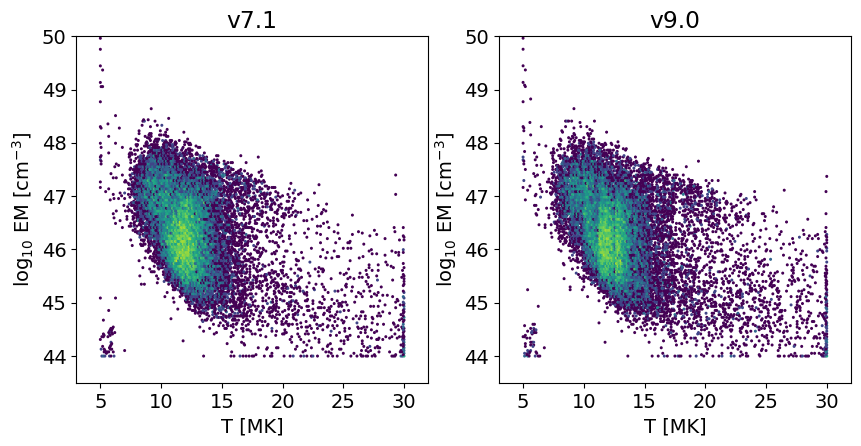

In [6]:
gs=200
vmax=30
tmkr=[3,32]
emr=[43.5,50]
fig,axs=plt.subplots(1,2,figsize=(10,4.5))
hex07=axs[0].hexbin(tmk07,np.log10(em07),gridsize=gs,cmap='viridis',\
        norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax),label='v7.1')
axs[0].set_title('v7.1')
hex09=axs[1].hexbin(tmk09,np.log10(em09),gridsize=gs,cmap='viridis',\
        norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax),label='v9.0')
        # norm=matplotlib.colors.Normalize(vmin=1, vmax=vmax),label='v9.0')
axs[1].set_title('v9.0')

for a in axs:
        a.set_xlim(tmkr)
        a.set_ylim(emr)
        a.set_ylabel('log$_{10}$ EM [cm$^{-3}$]')
        a.set_xlabel('T [MK]')
plt.show()

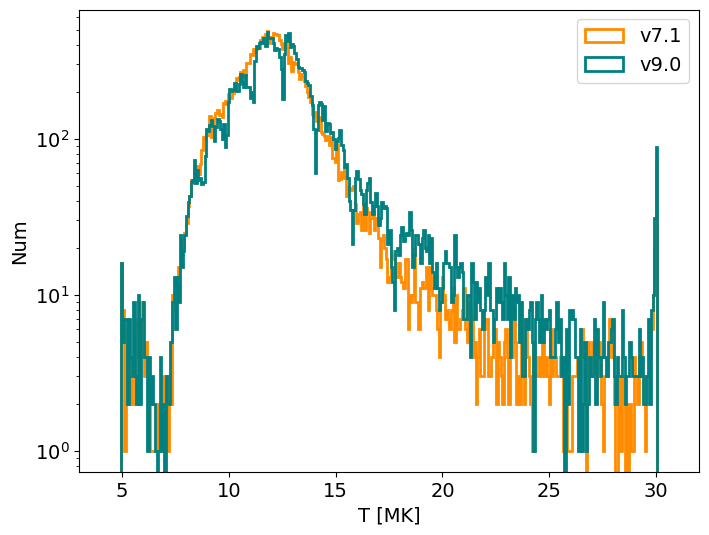

In [7]:
gs=400
tmkr=[3,32]
fig,ax=plt.subplots(figsize=(8,6))
# ax.hist(tmk05,bins=gs,range=tmkr,histtype='step',lw=2,color='indigo',label='v5.2')
ax.hist(tmk07,bins=gs,range=tmkr,histtype='step',lw=2,color='darkorange',label='v7.1')
ax.hist(tmk09,bins=gs,range=tmkr,histtype='step',lw=2,color='teal',label='v9.0')
# ax.hist(tmk10,bins=gs,range=tmkr,histtype='step',lw=2,color='dodgerblue',label='v10.1')
ax.set_xlim(tmkr)
ax.set_ylabel('Num')
ax.set_xlabel('T [MK]')
ax.set_yscale('log')
plt.legend()
plt.show()

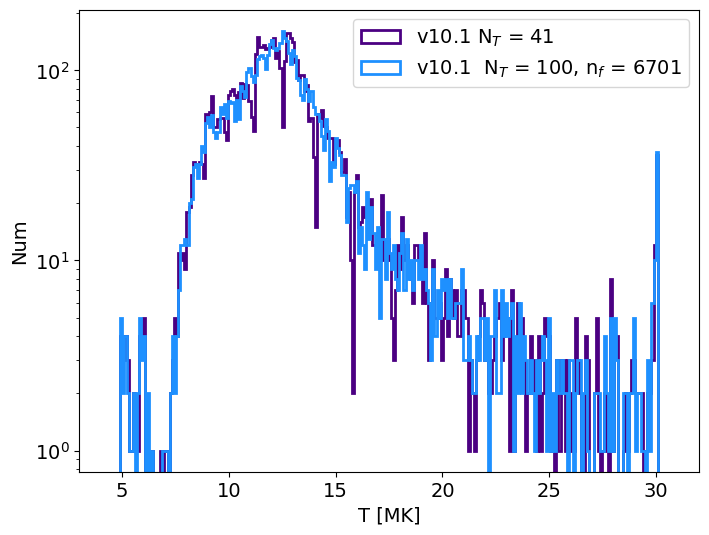

In [8]:
# Still running v10 t100, so only using subset of flares fitted with both v10 t41 and t100
gs=300
tmkr=[3,32]
fig,ax=plt.subplots(figsize=(8,6))
# ax.hist(tmk10,bins=gs,range=tmkr,histtype='step',lw=2,color='indigo',label=f'v10.1 N$_T$ = 41, n$_f$ = {np.count_nonzero(tmk10):.0f}')
ax.hist(tmk10[:np.count_nonzero(tmk10t)],bins=gs,range=tmkr,histtype='step',lw=2,color='indigo',label=f'v10.1 N$_T$ = 41')
ax.hist(tmk10t,bins=gs,range=tmkr,histtype='step',lw=2,color='dodgerblue',label=f'v10.1  N$_T$ = 100, n$_f$ = {np.count_nonzero(tmk10t):.0f}')
ax.set_xlim(tmkr)
ax.set_ylabel('Num')
ax.set_xlabel('T [MK]')
ax.set_yscale('log')
plt.legend()
plt.show()

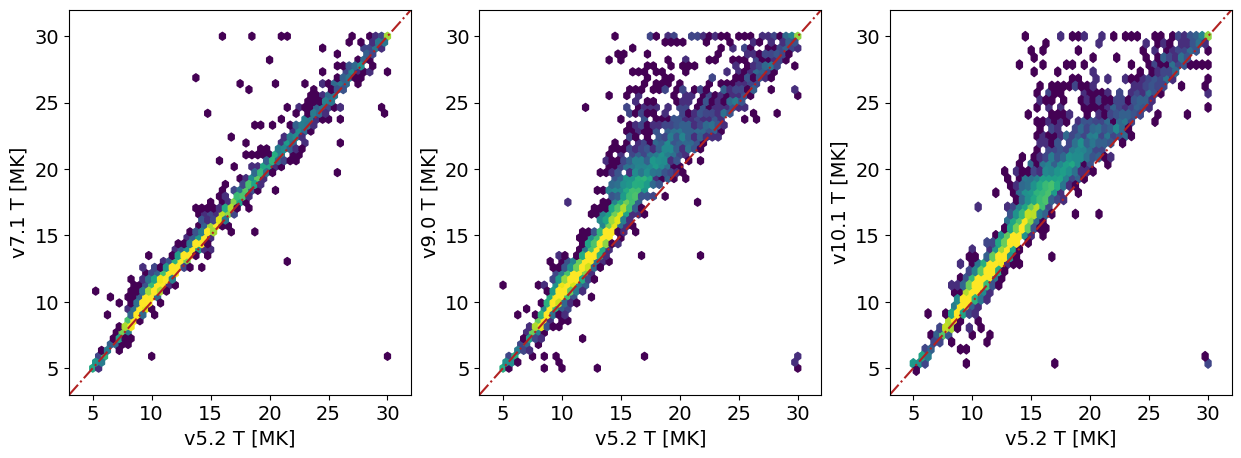

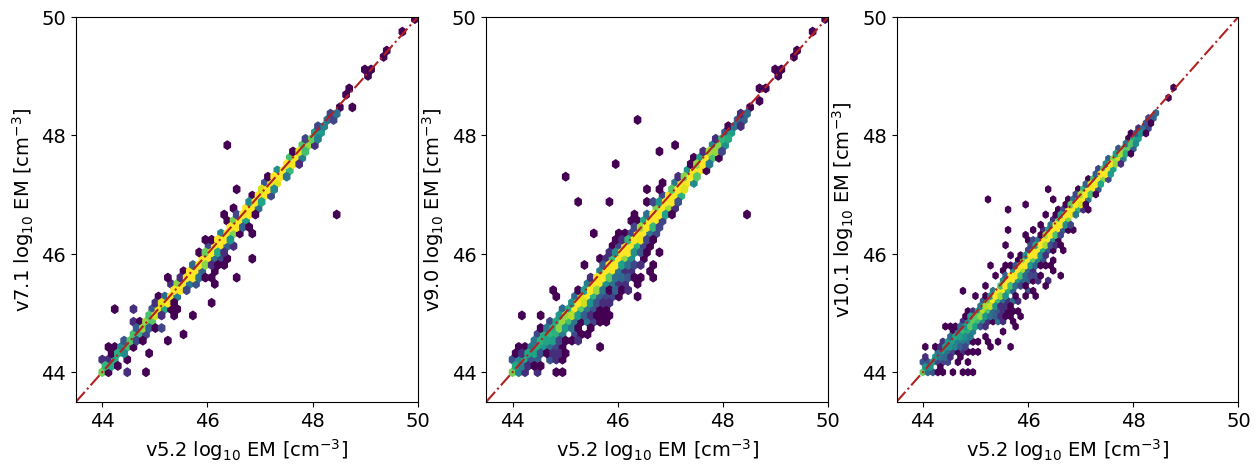

In [9]:
tmkr=[3,32]
gs=50
vmax=200
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(tmk05,tmk07,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 T [MK]')
axs[1].hexbin(tmk05,tmk09,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 T [MK]')
axs[2].hexbin(tmk05,tmk10,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 T [MK]')

for ax in axs:
    ax.set_xlim(tmkr)
    ax.set_ylim(tmkr)
    ax.plot(tmkr,tmkr,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax.set_xlabel('v5.2 T [MK]')
plt.show()
# ------------------------------------------------------
emr=[43.5,50]
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(np.log10(em05),np.log10(em07),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 log$_{10}$ EM [cm$^{-3}$]')
axs[1].hexbin(np.log10(em05),np.log10(em09),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 log$_{10}$ EM [cm$^{-3}$]')
axs[2].hexbin(np.log10(em05),np.log10(em10),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 log$_{10}$ EM [cm$^{-3}$]')

for ax in axs:
    ax.set_xlim(emr)
    ax.set_ylim(emr)
    ax.plot(emr,emr,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_xlabel('v5.2 log$_{10}$ EM [cm$^{-3}$]')
plt.show()